In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/emilyPark/.pyenv/versions/3.7.5/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/emilyPark/.pyenv/versions/3.7.5/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/emilyPark/.pyenv/versions/3.7.5/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/emilyPark/.pyenv/versions/3.7.5/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/emilyPark/.pyenv/versions/3.7.5/lib/python3.7

In [25]:
normal = pd.read_csv('normal_products.csv')
ads = pd.read_csv('ad_products.csv')

In [26]:
normal.columns

Index(['id', 'name', 'price', 'status', 'exchange', 'contact', 'free_shipping',
       'used', 'adult', 'uid', 'report_score', 'keywords', 'update_time',
       'category_level1', 'comment_count', 'view_cnt', 'imp_cnt', 'ctr',
       'favorite_count', 'contact_count'],
      dtype='object')

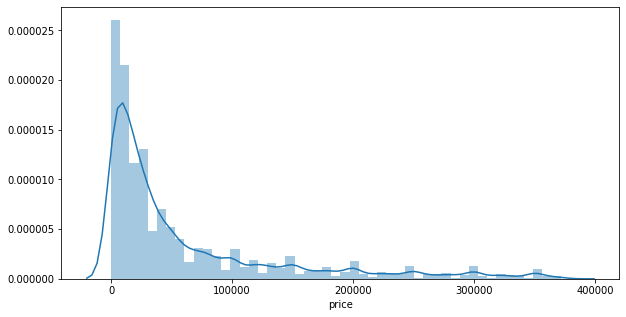

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(normal[normal['price'] < normal['price'].quantile(0.9)]['price'])

In [38]:
normal.groupby('status')['id'].apply(lambda x: round(len(x)/len(normal)*100, 2))

status
0    55.29
1     1.55
2    28.19
3    14.97
Name: id, dtype: float64

In [40]:
normal.groupby('free_shipping')['id'].count()

free_shipping
0    198463
1     76646
Name: id, dtype: int64

In [43]:
normal.groupby('uid', as_index=False)['id'].count().groupby('id',as_index=False)['uid'].count()

,id,uid
0,1,42645
1,2,17362
2,3,8493
3,4,4439
4,5,2711
...,...,...
135,185,2
136,186,1
137,189,1
138,199,2


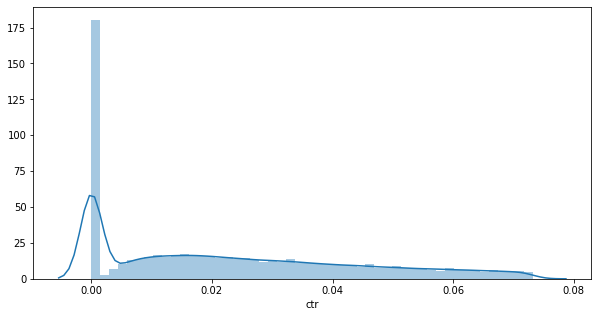

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(normal[normal['ctr'] < normal['ctr'].quantile(0.8)]['ctr'])

In [5]:
normal = normal.sample(n=80)
ads = ads.sample(n=80)

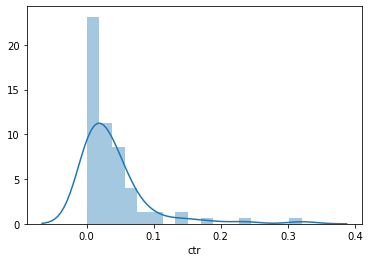

In [7]:
sns.distplot(normal['ctr'])

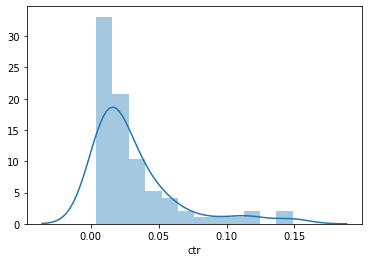

In [9]:
sns.distplot(ads['ctr'])

In [19]:
print('normal ctr average: ', normal['ctr'].mean())
print('normal ctr median: ', normal['ctr'].median())
print('ads ctr average: ', ads['ctr'].mean())
print('ads ctr median: ', ads['ctr'].median())

normal ctr average:  0.039279999999999995
normal ctr median:  0.026750000000000003
ads ctr average:  0.03132
ads ctr median:  0.0212


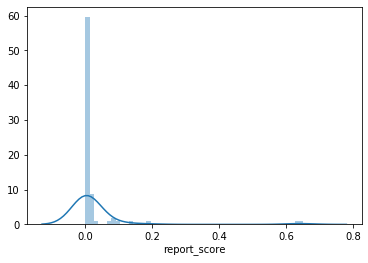

In [10]:
sns.distplot(normal['report_score'])

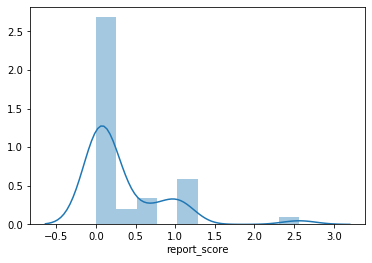

In [11]:
sns.distplot(ads['report_score'])

In [15]:
print('normal comment count avg: ', normal['comment_count'].mean())
print('normal comment count median: ', normal['comment_count'].median())
print('ads comment count avg: ', ads['comment_count'].mean())
print('ads comment count median: ', ads['comment_count'].median())

normal comment count avg:  0.225
normal comment count median:  0.0
ads comment count avg:  0.9875
ads comment count median:  0.0


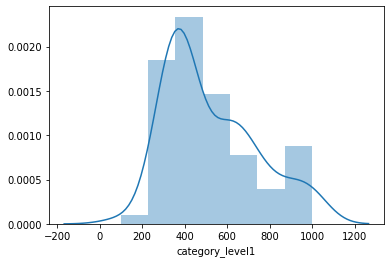

In [16]:
sns.distplot(normal['category_level1'])

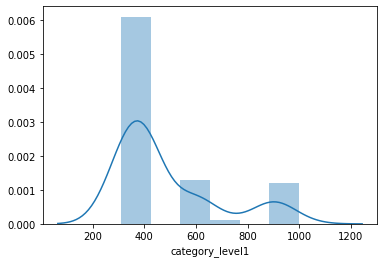

In [17]:
sns.distplot(ads['category_level1'])

In [18]:
ads.columns

Index(['id', 'name', 'price', 'status', 'exchange', 'contact', 'free_shipping',
       'used', 'adult', 'uid', 'report_score', 'keywords', 'update_time',
       'category_level1', 'comment_count', 'view_cnt', 'imp_cnt', 'ctr',
       'favorite_count', 'contact_count', 'budget', 'max_cpc'],
      dtype='object')

In [ ]:
normal['']

- 광고가 ctr이 낮은 경향이 있으니, ctr에다가 weight를 더 준다  
- 광고가 report_score가 높은 경향 -> lower weight?  
- 광고가 카테고리 1 depth의 범위가 훨씬 좁다 -> 인기 없는 카테고리 관련 광고를 신청했을때 점수를 더 올려준다?  
- 

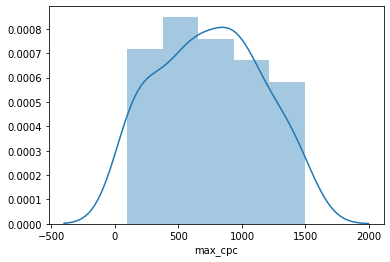

In [20]:
sns.distplot(ads['max_cpc'])

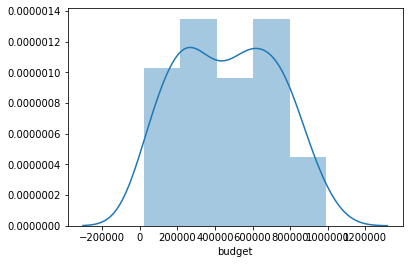

In [21]:
sns.distplot(ads['budget'])

In [22]:
print(normal['imp_cnt'].mean())
print(ads['imp_cnt'].mean())

206.5125
7212.0375


In [23]:
print(normal['view_cnt'].mean())
print(ads['view_cnt'].mean())

8.975
138.525


In [24]:
print(normal['ctr'].mean())
print(ads['ctr'].mean())

0.039279999999999995
0.03132


In [ ]:
print(normal[''])